In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

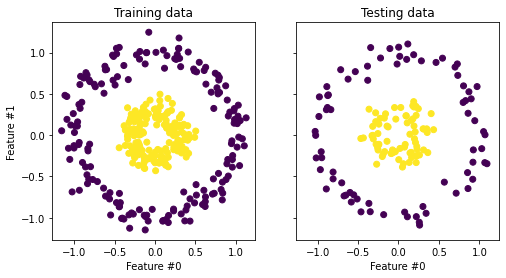

In [2]:
# Generar un dataset no linealmente separable
X, y = make_circles(n_samples=500, factor=0.3, noise=0.08, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")
test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [3]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        75
           1       0.87      0.96      0.91        75

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150



In [4]:
kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)
X_train_KPCA = kpca.fit_transform(X_train)
X_test_KPCA = kpca.transform(X_test)


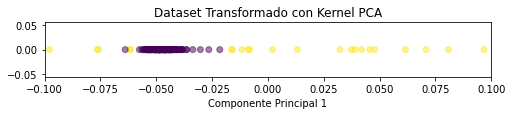

In [5]:
# Visualizar el dataset transformado
plt.figure(figsize=(8, 1))
plt.scatter(X_train_KPCA, np.zeros_like(X_train_KPCA), c=y_train, cmap='viridis', alpha=0.5)
plt.title('Dataset Transformado con Kernel PCA')
plt.xlabel('Componente Principal 1')
plt.xlim(-0.1, 0.1)
plt.show()


In [6]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train_KPCA, y_train)

y_pred = clf.predict(X_test_KPCA)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        75
           1       1.00      0.99      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

